In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
car_data=pd.read_csv("/car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print(car_data.shape)
print((car_data==None).sum())
print((car_data!=car_data).sum())

(301, 9)
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


so, no empty values so handling missing values is not required.

In [ ]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

are in expected datatyped so no conversions required.

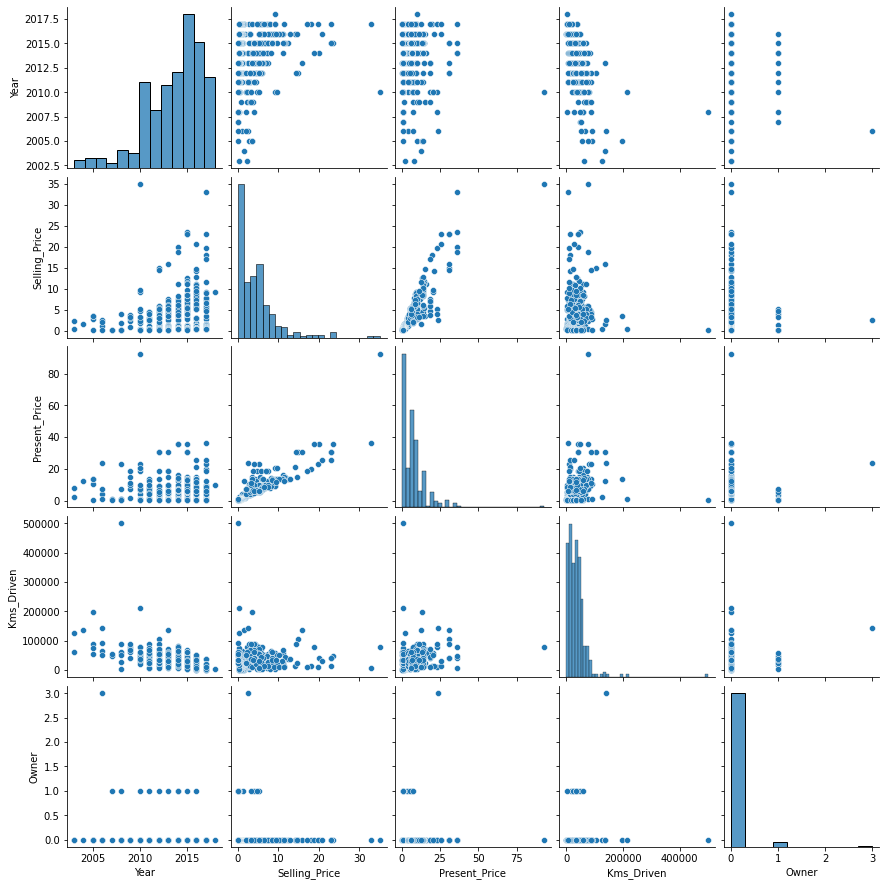

In [ ]:
sns.pairplot(car_data)

i) We know that name can have no relation with the selling price so we exculde that.

ii) As we can see as year increases the selling prise is also increasing so we can troansform year column into age(2020-year)  we taking year-2020 for conerting negative correlation into possitive correlation.

iii)And by the above pair plot we can say that not much of multicollinearity is observed.

                   Year  Selling_Price
Year           1.000000       0.236141
Selling_Price  0.236141       1.000000


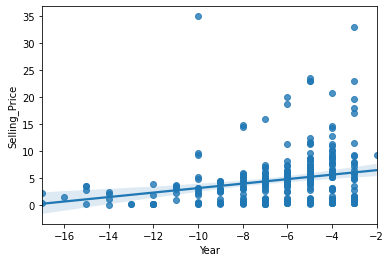

In [ ]:
car_data['Year']=car_data['Year']-2020
print(car_data[["Year","Selling_Price"]].corr())
sns.regplot(x="Year",y='Selling_Price',data=car_data)

i) We can see the positive corelation which means newer the car is higher the price will be. Though the correlation is not so high it does have some effect.

               Present_Price  Selling_Price
Present_Price       1.000000       0.878983
Selling_Price       0.878983       1.000000


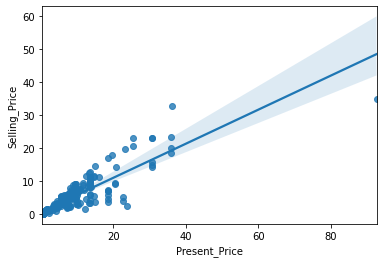

In [ ]:
print((car_data[['Present_Price','Selling_Price']]).corr())
sns.regplot(x="Present_Price",y='Selling_Price',data=car_data)

i)  Good amount of correlation can be seen inbetween attributed Present price and selling price so higher the present price higher the selling price will be.

               Kms_Driven  Selling_Price
Kms_Driven       1.000000       0.029187
Selling_Price    0.029187       1.000000


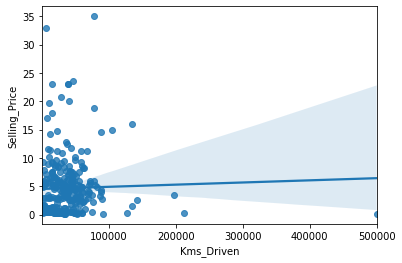

In [ ]:
print((car_data[['Kms_Driven','Selling_Price']]).corr())
sns.regplot(x="Kms_Driven",y='Selling_Price',data=car_data)

i) The value of corelation between Kms driven and selling price is very small and it is positive so according to correlation value we can coclude that as kilometers driven increases the cost increases by a small value. But we know that it should be in reverse the way it is now this might be beacause of the limited dataset in which data doesnot reflect the quality described.

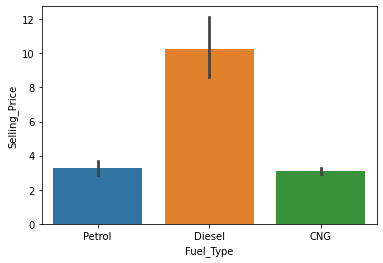

In [ ]:
sns.barplot(x="Fuel_Type",y='Selling_Price',data=car_data)

As attribute fuel type has categorical data corelation cant be caluculated. By barplot we can say that cars of fuel type - diesel cost is more compared to petrol and cng types.

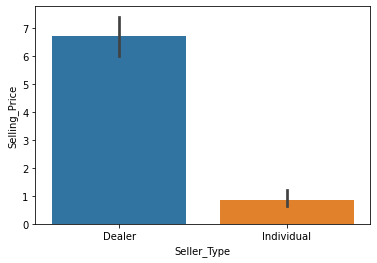

In [ ]:
sns.barplot(x="Seller_Type",y='Selling_Price',data=car_data)

This barplot tells us that cars sold by dealars are way costly than cars sold by individuals.

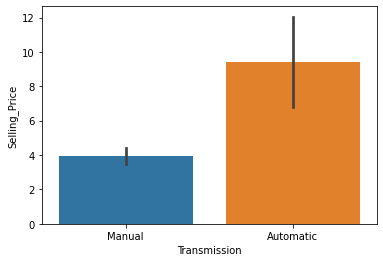

In [ ]:
sns.barplot(x="Transmission",y='Selling_Price',data=car_data)

So by this we can say that automatic trasmission gear cars are more costly manual gear trabsmission.

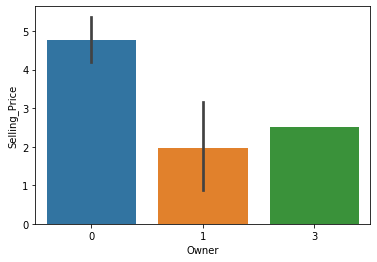

In [ ]:
sns.barplot(x="Owner",y='Selling_Price',data=car_data)

Newer the car is higer the cost will be

...All above mentioned bargraphs represent the range of selling prices of each value in x-axis which are catogorical. The line in the center is is the range of selling prices from its center(top of the rectangle).

-->>As the output expected is continous and we found not much of colinearity exists between independent variables so i am going to apply linear regression.

# conclusions
from above plots we can say that every variable is related to the dependent variable(selling price) among all kilometers travelled showed least correlation so we can try building a model and check which one gives us better estimates.

1) with 'kms_travelled'

2) without 'kms_travelled'

and we can see that, though values of attribute owner are numerical they are categorical so 2 models can be made :

1) taking owner attribute as numerical  

2) taking owner attribute as catagorical and use dummy variables

In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car_data=car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
cd_with_dummies=pd.get_dummies(car_data,drop_first=True)
cd_with_dummies.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

1)  taking owner attribute as numerical  and ignoring kms_travelled

In [ ]:
y1=cd_with_dummies['Selling_Price']
x1=cd_with_dummies[['Year', 'Present_Price', 'Owner','Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual','Transmission_Manual']]
x1

,Year,Present_Price,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-6,5.59,0,0,1,0,1
1,-7,9.54,0,1,0,0,1
2,-3,9.85,0,0,1,0,1
3,-9,4.15,0,0,1,0,1
4,-6,6.87,0,1,0,0,1
...,...,...,...,...,...,...,...
296,-4,11.60,0,1,0,0,1
297,-5,5.90,0,0,1,0,1
298,-11,11.00,0,0,1,0,1
299,-3,12.50,0,1,0,0,1


In [ ]:
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [ ]:
reg=LinearRegression()
reg.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.intercept_)
print(reg.coef_)

4.668378690093171
[ 0.4284824   0.42582322 -0.9586005   2.42568204  0.61156513 -1.11948485
 -1.30065782]


In [ ]:
mean_squared_error(y_true=y1_train, y_pred=reg.predict(x1_train))

3.306272667304246

In [ ]:
r2_score(y_true=y1_train, y_pred=reg.predict(x1_train))

0.8717051916959566

In [ ]:
mean_squared_error(y_true=y1_test, y_pred=reg.predict(x1_test))

2.2379931905684907

In [ ]:
r2_score(y_true=y1_test, y_pred=reg.predict(x1_test))

0.9114623972338541

by R squared value we can say that our regression line or model is able to predict 91 ppercent correctly on unseen data(test data) which is a good sign.

2) taking dummy variable of owner attribute as  and ignoring kms_travelled

In [ ]:
y2=y1
y2

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
x2=x1
x2["Owner"].replace({1:'one',0:'zero',3:'three'},inplace=True)
x2

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Year,Present_Price,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-6,5.59,zero,0,1,0,1
1,-7,9.54,zero,1,0,0,1
2,-3,9.85,zero,0,1,0,1
3,-9,4.15,zero,0,1,0,1
4,-6,6.87,zero,1,0,0,1
...,...,...,...,...,...,...,...
296,-4,11.60,zero,1,0,0,1
297,-5,5.90,zero,0,1,0,1
298,-11,11.00,zero,0,1,0,1
299,-3,12.50,zero,1,0,0,1


In [ ]:
x2=pd.get_dummies(x2,drop_first=True)
x2

,Year,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_three,Owner_zero
0,-6,5.59,0,1,0,1,0,1
1,-7,9.54,1,0,0,1,0,1
2,-3,9.85,0,1,0,1,0,1
3,-9,4.15,0,1,0,1,0,1
4,-6,6.87,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
296,-4,11.60,1,0,0,1,0,1
297,-5,5.90,0,1,0,1,0,1
298,-11,11.00,0,1,0,1,0,1
299,-3,12.50,1,0,0,1,0,1


In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
reg2=LinearRegression()
reg2.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg2.coef_

array([ 3.87817403e-01,  4.30712413e-01,  2.42039017e+00,  5.51288629e-01,
       -1.14147250e+00, -1.53044037e+00, -6.50892284e+00, -7.65922863e-01,
       -5.44397659e-06])

In [ ]:
reg2.intercept_

5.58078948173715

In [ ]:
mean_squared_error(y_true=y2_train, y_pred=reg2.predict(x2_train))

3.1702682875264987

In [ ]:
r2_score(y_true=y2_train,y_pred=reg2.predict(x2_train))

0.8769826317584918

In [ ]:
mean_squared_error(y_true=y2_test, y_pred=reg2.predict(x2_test))

2.1170164430622362

In [ ]:
r2_score(y_true=y2_test, y_pred=reg2.predict(x2_test))

0.9179827767356279

upon taking dummy variables for owner attribute we can see a slight elvation in Rsquared values of both test and train datasets and mean square error has also decreased a bit. So this a bit better model as data is well prossed.

3) now lets include kms driven and see its effect

In [ ]:
y3=y2
x3=x2
x3["Kms_Driven"]=car_data['Kms_Driven']
x3

,Year,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_three,Owner_zero,Kms_Driven
0,-6,5.59,0,1,0,1,0,1,27000
1,-7,9.54,1,0,0,1,0,1,43000
2,-3,9.85,0,1,0,1,0,1,6900
3,-9,4.15,0,1,0,1,0,1,5200
4,-6,6.87,1,0,0,1,0,1,42450
...,...,...,...,...,...,...,...,...,...
296,-4,11.60,1,0,0,1,0,1,33988
297,-5,5.90,0,1,0,1,0,1,60000
298,-11,11.00,0,1,0,1,0,1,87934
299,-3,12.50,1,0,0,1,0,1,9000


In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)
reg3=LinearRegression()
reg3.fit(x3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg3.coef_

array([ 3.87817403e-01,  4.30712413e-01,  2.42039017e+00,  5.51288629e-01,
       -1.14147250e+00, -1.53044037e+00, -6.50892284e+00, -7.65922863e-01,
       -5.44397659e-06])

In [ ]:
mean_squared_error(y_true=y3_train, y_pred=reg3.predict(x3_train))

3.1702682875264987

In [ ]:
r2_score(y_true=y3_train, y_pred=reg3.predict(x3_train))

0.8769826317584918

In [ ]:
mean_squared_error(y_true=y3_test, y_pred=reg3.predict(x3_test))

2.073175480703054

In [ ]:
r2_score(y_true=y3_test, y_pred=reg3.predict(x3_test))

0.9179827767356279

Adding kms driven attribute made no difference so it can be excluded as we can the coefficent of kms driven is very small so that is the reason why it had no effect on the results of model. So for this dataset kms driven is of no use.

work from previous notebook:
i followed this notebook as a refernce https://www.kaggle.com/anzeee/linear-regression-for-car-price where relation between every variable to selling price is stated and a linear regression model is built.

My findings were elimination of Kms_travelled attribute as it has nothing to do in the model because of its inverse behaviour.

And i have tried using owner atrribute as categorical data and it was observed that a bit of improvement is there.